# Importing the Libraries

In [1]:
import pandas as pd
from mysklearn.mypytable import MyPyTable
from mysklearn import myutils
from mysklearn import plot_utils
from mysklearn.myclassifiers import MySimpleLinearRegressor
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
mytable = MyPyTable()
dataset = mytable.load_from_json_file('yelp_academic_dataset_business.json', 30000)

In [3]:
dataset.head()

business_id             name                     address              city         state      postal_code    latitude    longitude    stars    review_count    is_open  attributes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [4]:
dataset.get_shape()

(30001, 14)

In [5]:
dataset.remove_rows_with_missing_values()

In [6]:
dataset.get_shape()

(30001, 14)

# Selecting Business Attributes 

In [7]:
id_ = dataset.get_column('business_id')
review_count = dataset.get_column('review_count')
attributes = dataset.get_column('attributes')

In [8]:
mytable2 = MyPyTable()
dataset2 = mytable2.load_from_json_file('yelp_academic_dataset_tip.json', 30000)
dataset2.head()

user_id                 business_id             text                                                                                                       date                   compliment_count
----------------------  ----------------------  ---------------------------------------------------------------------------------------------------------  -------------------  ------------------
WCjg0jdHXMlwbqS9tZUx8Q  ENwBByjpoa5Gg7tKgxqwLg  Carne asada chips...                                                                                       2011-07-22 19:07:35                   0
42-Z02y9bABShAGZhuSzrQ  jKO4Og6ucdX2-YCTKQVYjg  Best happy hour from 3pm to 6pm! $1 off martini's on Fridays! "Nothing but pink" is delicious!             2014-09-10 07:33:29                   0
5u7E3LYp_3eB8dLuUBazXQ  9Bto7mky640ocgezVKSfVg  Nice people, skilled staff, clean location - but! I don't think I've ever been taken on time. In 2 years.  2013-12-13 23:23:41                   0
wDWoMG5N9oI4DJ-p7z8EBg  X

In [9]:
id_2 = dataset2.get_column('business_id')
user_id = dataset2.get_column('user_id')
text = dataset2.get_column('text')

In [10]:
new_id = []
new_user_id = []
new_text = []
for id in id_:
    if id in id_2:
        new_id.append(id)
        index = id_2.index(id)
        new_user_id.append(user_id[index])
        new_text.append(text[index])

In [11]:
new_id = new_id[:1500]
new_user_id = new_user_id[:1500]

In [12]:
new_text = new_text[:1500]

In [13]:
new_rev_count = []
new_attributes = []
for id in new_id:
    index = id_.index(id)
    new_rev_count.append(review_count[index])
    new_attributes.append(attributes[index])

In [14]:
mytable3 = MyPyTable()
dataset3 = mytable3.load_from_json_file('yelp_academic_dataset_user.json', 250000)

In [15]:
user_id = dataset3.get_column('user_id')
fans = dataset3.get_column('fans')
compliment_plain = dataset3.get_column('compliment_plain')
friends = dataset3.get_column('friends')
useful = dataset3.get_column('useful')

In [16]:
new_fans = []
new_comp_plain = []
new_friends = []
new_useful = []
for id in new_user_id: 
    if id in user_id:
        index = user_id.index(id)
        new_fans.append(fans[index])
        new_comp_plain.append(compliment_plain[index])
        new_friends.append(friends[index])
        new_useful.append(useful[index])

In [17]:
new_dataset = [[a, b, c, d, e, f, g] for a, b, c, d, e, f, g in zip(new_rev_count, new_attributes, new_text, new_fans, new_comp_plain, new_friends, new_useful)]

# Exploratory Data Analysis

## Data Preprocessing

In [18]:
columns = ['Review Count', 'Attributes', 'Review Length', 'Fans', 'Compliment Plain', 'Friends', 'Useful']
final_dataset = MyPyTable(columns, new_dataset)

In [19]:
final_dataset.replace_missing_values_with_column_average('Review Count')
final_dataset.replace_missing_values_with_column_average('Attributes')
final_dataset.replace_missing_values_with_column_average('Review Length')
final_dataset.replace_missing_values_with_column_average('Fans')
final_dataset.replace_missing_values_with_column_average('Compliment Plain')
final_dataset.replace_missing_values_with_column_average('Friends')
final_dataset.replace_missing_values_with_column_average('Useful')

In [20]:
final_dataset.get_shape()

(1500, 7)

In [21]:
final_dataset.remove_rows_with_missing_values()

In [22]:
final_dataset.get_shape()

(1500, 7)

### Summarization: Column Names, Minimum, Maximum, Middle, Average, Medium Values

In [23]:
stats = final_dataset.compute_summary_statistics(col_names=['Review Count', 'Fans', 'Compliment Plain', 'Useful'])

In [24]:
stats.pretty_print()

                        Review Count     Fans    Compliment Plain    Useful
----------------  --  --------------  -------  ------------------  --------
Review Count       5            4708   2356.5            191.515       97
Fans               0            2938   1469               30.3627       4
Compliment Plain   0            7913   3956.5            121.114        4
Useful             0           56628  28314              850.453      108.5


## Visualization

### Frequency Diagrams

#### Applying Discretization To Review Count To Generate Frequency Diagram

In [25]:
review_values = final_dataset.get_column('Review Count')
new_review_values = []
review_counts = [0] * 10
ranges = ['≤ 13', '14-50', '51-100', '101-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '≥ 1200']
for val in review_values:
    if val <= 13:
        new_review_values.append('≤ 13')
        review_counts[0] += 1
    elif 14 <= val <= 50:
        new_review_values.append('14-50')
        review_counts[1] += 1
    elif 51 <= val <= 100:
        new_review_values.append('51-100')
        review_counts[2] += 1
    elif 101 <= val <= 200:
        new_review_values.append('101-200')
        review_counts[3] += 1
    elif 201 <= val <= 400:
        new_review_values.append('201-400')
        review_counts[4] += 1
    elif 401 <= val <= 600:
        new_review_values.append('401-600')
        review_counts[5] += 1
    elif 601 <= val <= 800:
        new_review_values.append('601-800')
        review_counts[6] += 1
    elif 801 <= val <= 1000:
        new_review_values.append('801-1000')
        review_counts[7] += 1
    elif 1001 <= val <= 1200:
        new_review_values.append('1001-1200')
        review_counts[8] += 1
    elif val >= 1200:
        new_review_values.append('≥ 1200')
        review_counts[9] += 1

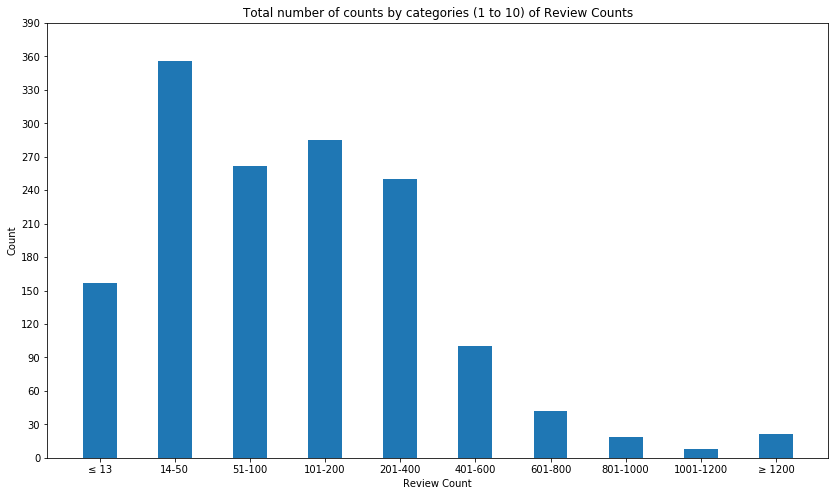

In [26]:
x_range = range(len(ranges))
y_range = range(0, max(review_counts)+50, 30)
plot_utils.frequency_diagram(ranges, review_counts, ranges, y_range, 'Total number of counts by categories (1 to 10) of Review Counts', 'Review Count', 'Count')

#### Applying Discretization To Review Length To Generate Frequency Diagram

In [27]:
review_length = final_dataset.get_column('Review Length')
review_length = [len(str(t)) for t in review_length]
new_review_length = []
review_length_counts = [0] * 5
ranges = ['≤ 20', '21-50', '51-100', '101-200', '≥ 200']
for val in review_length:
    if val <= 20:
        new_review_values.append('≤ 20')
        review_length_counts[0] += 1
    elif 14 <= val <= 50:
        new_review_values.append('21-50')
        review_length_counts[1] += 1
    elif 51 <= val <= 100:
        new_review_values.append('51-100')
        review_length_counts[2] += 1
    elif 101 <= val <= 200:
        new_review_values.append('101-200')
        review_length_counts[3] += 1
    elif val > 200:
        new_review_values.append('≥ 200')
        review_length_counts[4] += 1

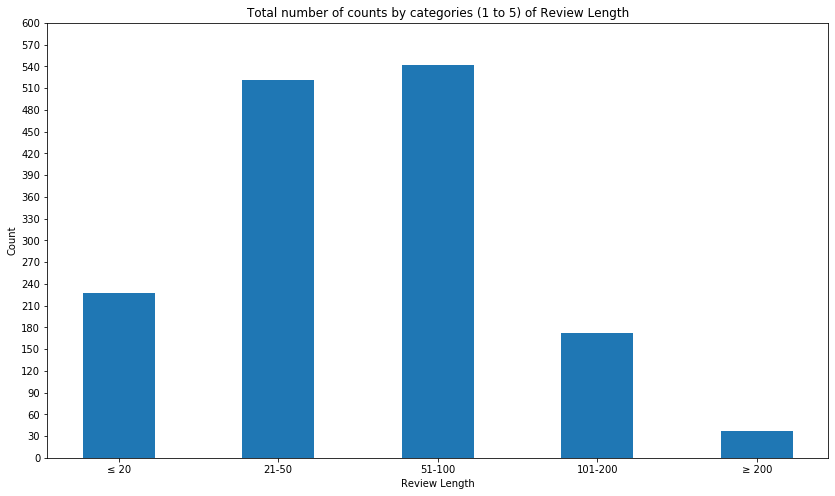

In [28]:
x_range = range(len(ranges))
y_range = range(0, max(review_length_counts)+60, 30)
plot_utils.frequency_diagram(ranges, review_length_counts, ranges, y_range, 'Total number of counts by categories (1 to 5) of Review Length', 'Review Length', 'Count')

#### Applying Discretization To Attributes To Generate Frequency Diagram

In [29]:
attributes = final_dataset.get_column('Attributes')
attributes = [len(k.keys()) if k else 0 for k in attributes]
new_attributes = []
attributes_counts = [0] * 5
ranges = ['≤ 5', '6-10', '11-15', '16-20', '≥ 20']
for val in attributes:
    if val <= 5:
        new_attributes.append('≤ 5')
        attributes_counts[0] += 1
    elif 6 <= val <= 10:
        new_attributes.append('6-10')
        attributes_counts[1] += 1
    elif 11 <= val <= 15:
        new_attributes.append('11-15')
        attributes_counts[2] += 1
    elif 16 <= val <= 20:
        new_attributes.append('16-20')
        attributes_counts[3] += 1
    elif val > 20:
        new_attributes.append('≥ 20')
        attributes_counts[4] += 1

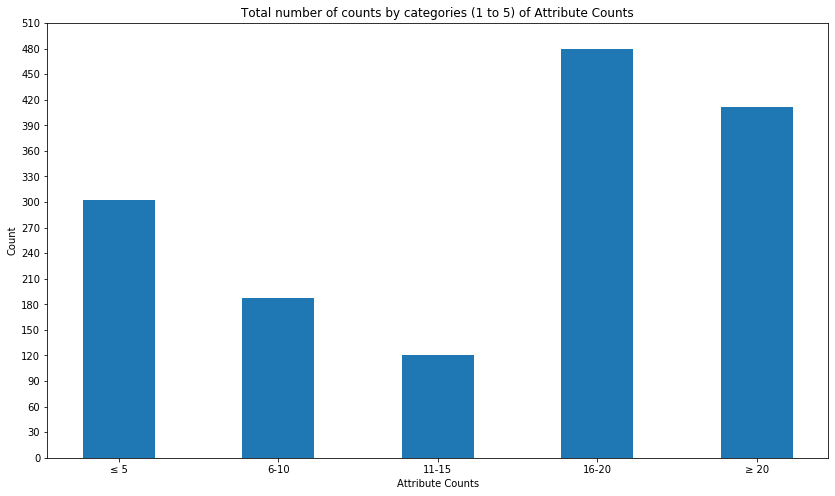

In [30]:
x_range = range(len(ranges))
y_range = range(0, max(attributes_counts)+60, 30)
plot_utils.frequency_diagram(ranges, attributes_counts, ranges, y_range, 'Total number of counts by categories (1 to 5) of Attribute Counts', 'Attribute Counts', 'Count')

#### Applying Discretization To Fans To Generate Frequency Diagram

In [31]:
fans_values = final_dataset.get_column('Fans')
new_fans_values = []
fans_counts = [0] * 10
ranges = ['0', '1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-300', '301-400', '≥ 400']
for val in fans_values:
    if val == 0:
        new_fans_values.append('0')
        fans_counts[0] += 1
    elif val <= 13:
        new_fans_values.append('1-5')
        fans_counts[1] += 1
    elif 14 <= val <= 50:
        new_fans_values.append('6-10')
        fans_counts[2] += 1
    elif 51 <= val <= 100:
        new_fans_values.append('11-20')
        fans_counts[3] += 1
    elif 201 <= val <= 400:
        new_fans_values.append('21-50')
        fans_counts[4] += 1
    elif 401 <= val <= 600:
        new_fans_values.append('51-100')
        fans_counts[5] += 1
    elif 601 <= val <= 800:
        new_fans_values.append('101-200')
        fans_counts[6] += 1
    elif 801 <= val <= 1000:
        new_fans_values.append('201-300')
        fans_counts[7] += 1
    elif 1001 <= val <= 1200:
        new_fans_values.append('301-400')
        fans_counts[8] += 1
    elif val >= 1200:
        new_fans_values.append('≥ 400')
        fans_counts[9] += 1

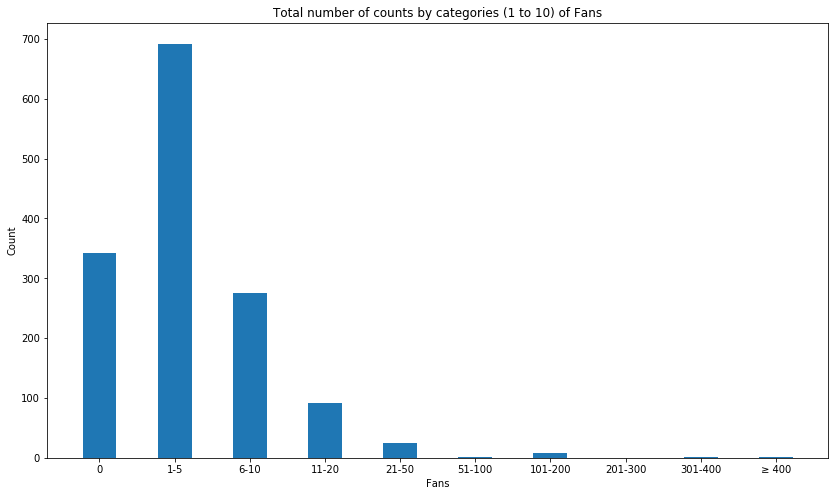

In [32]:
x_range = range(len(ranges))
y_range = range(0, max(fans_counts)+50, 100)
plot_utils.frequency_diagram(ranges, fans_counts, ranges, y_range, 'Total number of counts by categories (1 to 10) of Fans', 'Fans', 'Count')

#### Applying Discretization To Compliment Plain To Generate Frequency Diagram

In [33]:
comp_plain_values = final_dataset.get_column('Compliment Plain')
new_comp_plain_values = []
comp_plain_counts = [0] * 10
ranges = ['≤ 13', '14-50', '51-100', '101-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '≥ 1200']
for val in comp_plain_values:
    if val <= 13:
        new_comp_plain_values.append('≤ 13')
        comp_plain_counts[0] += 1
    elif 14 <= val <= 50:
        new_comp_plain_values.append('14-50')
        comp_plain_counts[1] += 1
    elif 51 <= val <= 100:
        new_comp_plain_values.append('51-100')
        comp_plain_counts[2] += 1
    elif 101 <= val <= 200:
        new_comp_plain_values.append('101-200')
        comp_plain_counts[3] += 1
    elif 201 <= val <= 400:
        new_comp_plain_values.append('201-400')
        comp_plain_counts[4] += 1
    elif 401 <= val <= 600:
        new_comp_plain_values.append('401-600')
        comp_plain_counts[5] += 1
    elif 601 <= val <= 800:
        new_comp_plain_values.append('601-800')
        comp_plain_counts[6] += 1
    elif 801 <= val <= 1000:
        new_comp_plain_values.append('801-1000')
        comp_plain_counts[7] += 1
    elif 1001 <= val <= 1200:
        new_comp_plain_values.append('1001-1200')
        comp_plain_counts[8] += 1
    elif val >= 1200:
        new_comp_plain_values.append('≥ 1200')
        comp_plain_counts[9] += 1

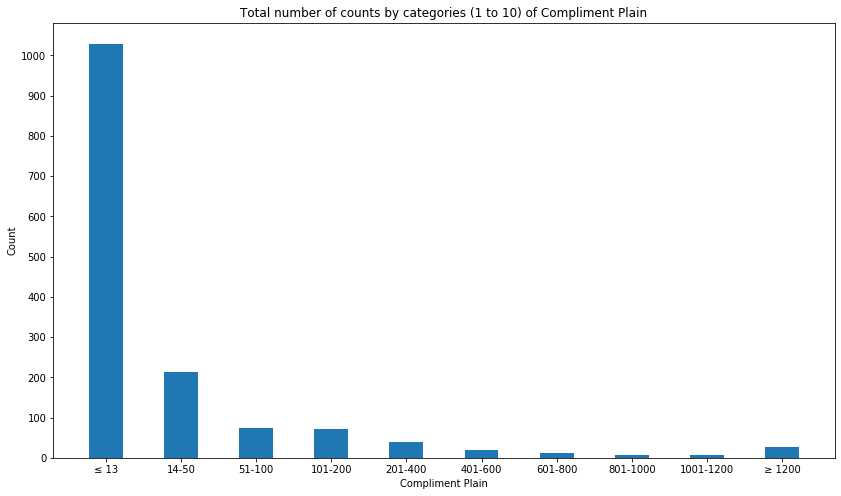

In [34]:
x_range = range(len(ranges))
y_range = range(0, max(comp_plain_counts)+50, 100)
plot_utils.frequency_diagram(ranges, comp_plain_counts, ranges, y_range, 'Total number of counts by categories (1 to 10) of Compliment Plain', 'Compliment Plain', 'Count')

#### Applying Discretization To Friends To Generate Frequency Diagram

In [35]:
friends = final_dataset.get_column('Friends')
friends_values = [len(str(f)) for f in friends]
new_friends_values = []
friends_counts = [0] * 10
ranges = ['≤ 100', '101-1000', '1001-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001-70000', '≥ 70000']
for val in friends_values:
    if val <= 100:
        new_friends_values.append('≤ 100')
        friends_counts[0] += 1
    elif 101 <= val <= 1000:
        new_friends_values.append('101-1000')
        friends_counts[1] += 1
    elif 1001 <= val <= 10000:
        new_friends_values.append('1001-10000')
        friends_counts[2] += 1
    elif 10001 <= val <= 20000:
        new_friends_values.append('10001-20000')
        friends_counts[3] += 1
    elif 20001 <= val <= 30000:
        new_friends_values.append('20001-30000')
        friends_counts[4] += 1
    elif 30001 <= val <= 40000:
        new_friends_values.append('30001-40000')
        friends_counts[5] += 1
    elif 40001 <= val <= 50000:
        new_friends_values.append('40001-50000')
        friends_counts[6] += 1
    elif 50001 <= val <= 60000:
        new_friends_values.append('50001-60000')
        friends_counts[7] += 1
    elif 60001 <= val <= 70000:
        new_friends_values.append('60001-70000')
        friends_counts[8] += 1
    elif val >= 70000:
        new_friends_values.append('≥ 70000')
        friends_counts[9] += 1

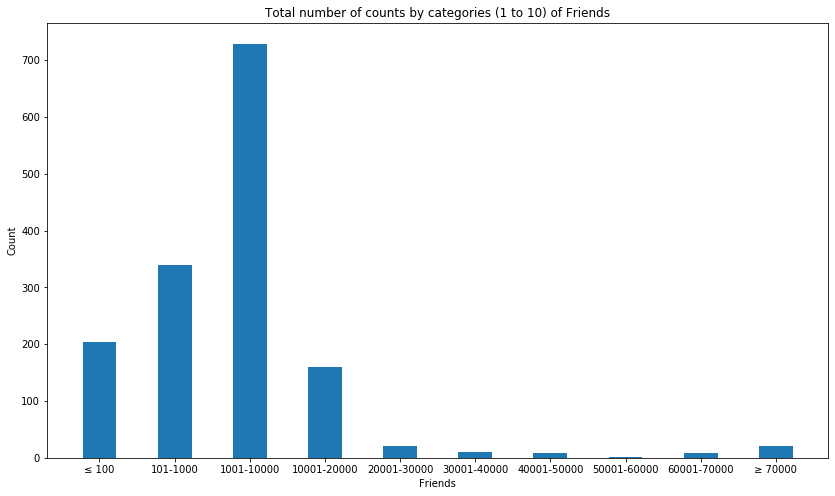

In [36]:
x_range = range(len(ranges))
y_range = range(0, max(friends_counts)+50, 100)
plot_utils.frequency_diagram(ranges, friends_counts, ranges, y_range, 'Total number of counts by categories (1 to 10) of Friends', 'Friends', 'Count')

#### Applying Discretization To Useful To Generate Frequency Diagram

In [37]:
useful_values = final_dataset.get_column('Useful')
new_useful_values = []
useful_counts = [0] * 10
ranges = ['≤ 13', '14-50', '51-100', '101-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '≥ 1200']
for val in useful_values:
    if val <= 13:
        new_useful_values.append('≤ 13')
        useful_counts[0] += 1
    elif 14 <= val <= 50:
        new_useful_values.append('14-50')
        useful_counts[1] += 1
    elif 51 <= val <= 100:
        new_useful_values.append('51-100')
        useful_counts[2] += 1
    elif 101 <= val <= 200:
        new_useful_values.append('101-200')
        useful_counts[3] += 1
    elif 201 <= val <= 400:
        new_useful_values.append('201-400')
        useful_counts[4] += 1
    elif 401 <= val <= 600:
        new_useful_values.append('401-600')
        useful_counts[5] += 1
    elif 601 <= val <= 800:
        new_useful_values.append('601-800')
        useful_counts[6] += 1
    elif 801 <= val <= 1000:
        new_useful_values.append('801-1000')
        useful_counts[7] += 1
    elif 1001 <= val <= 1200:
        new_useful_values.append('1001-1200')
        useful_counts[8] += 1
    elif val >= 1200:
        new_useful_values.append('≥ 1200')
        useful_counts[9] += 1

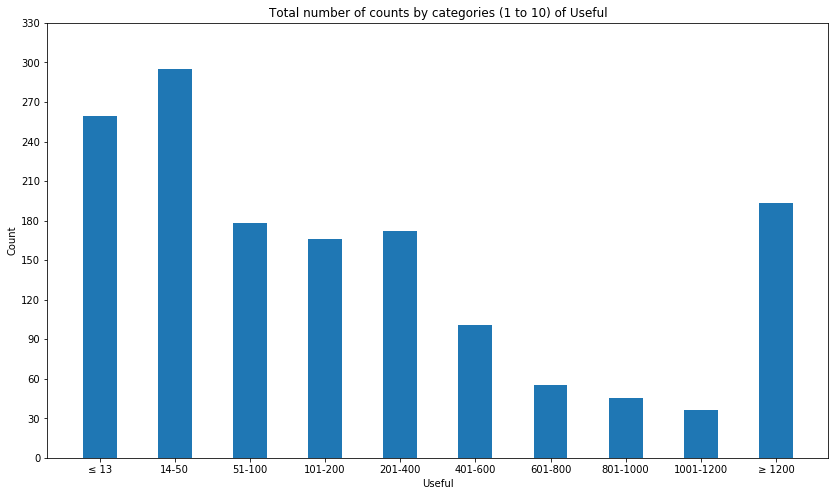

In [38]:
x_range = range(len(ranges))
y_range = range(0, max(useful_counts)+50, 30)
plot_utils.frequency_diagram(ranges, useful_counts, ranges, y_range, 'Total number of counts by categories (1 to 10) of Useful', 'Useful', 'Count')

### Box and Whisker Plot

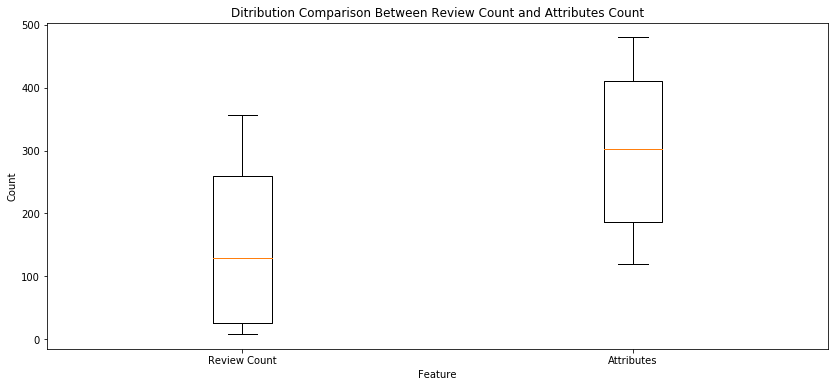

In [39]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, attributes_counts])
plt.title('Ditribution Comparison Between Review Count and Attributes Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Attributes'])
plt.show()

Review Count is positively skewed in terms of data distribution because its top tail is longer compared to Attributes box plot which has normal or symmetric distribution because of equal top and bottom tails and median being in middle of box. Although, Attributes has median value higher than Review Count which suggests clear disagreement between both features count. Finally, no outliers found in both features which is good for data mining and machine learning algorithms.

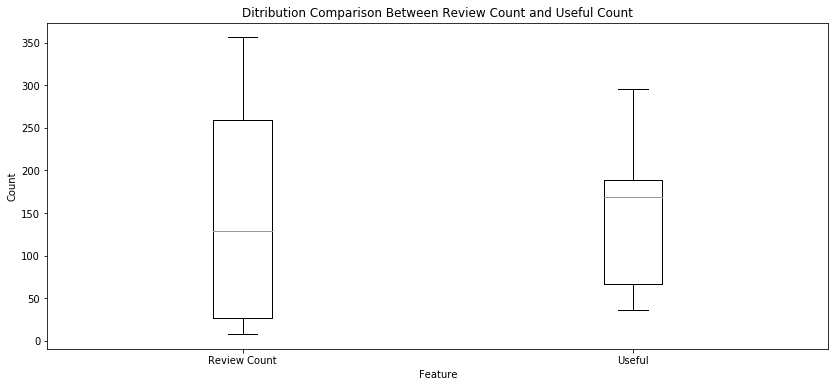

In [40]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, useful_counts])
plt.title('Ditribution Comparison Between Review Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Useful'])
plt.show()

Similar to Review Count, Useful also has positively skewed data distribution between its top tail is longer but its short in terms of box shape which suggests less dispersed data or less variability in Useful compared to Review Count. And, Useful has median value slightly above than Review Count which suggests disagreement between both features count. Finally, no outliers found in both features.

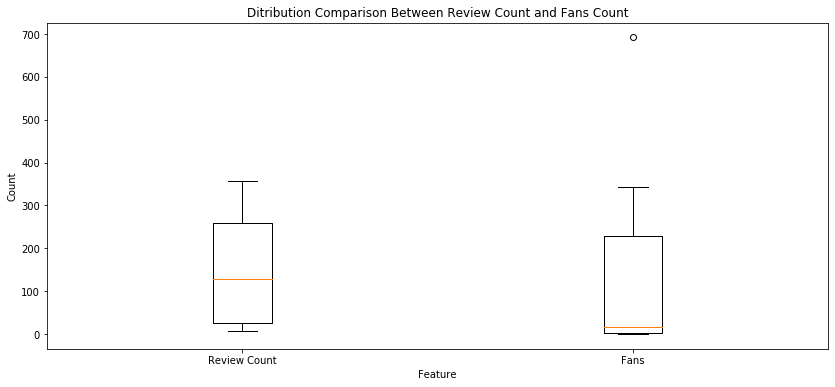

In [41]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, fans_counts])
plt.title('Ditribution Comparison Between Review Count and Fans Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Fans'])
plt.show()

Similar to Review Count, Fans also has positively skewed data distribution because of its longer top tail and median value close to bottom. Both features are in disagreement because Review Count has median value higher than Fans.

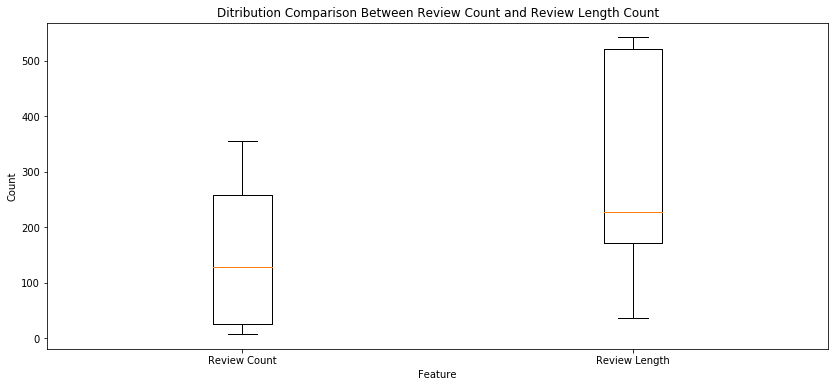

In [42]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, review_length_counts])
plt.title('Ditribution Comparison Between Review Count and Review Length Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Review Length'])
plt.show()

Compared to Review Count, Review Length has negatively skewed data distribution because of its bottom tail being longer but data is much dispersed and widely spread in Review Length compared to Review Count. And, both features are in disagreement because Review Length has median value higher than Review Count. Finally, no outliers found in both features count.

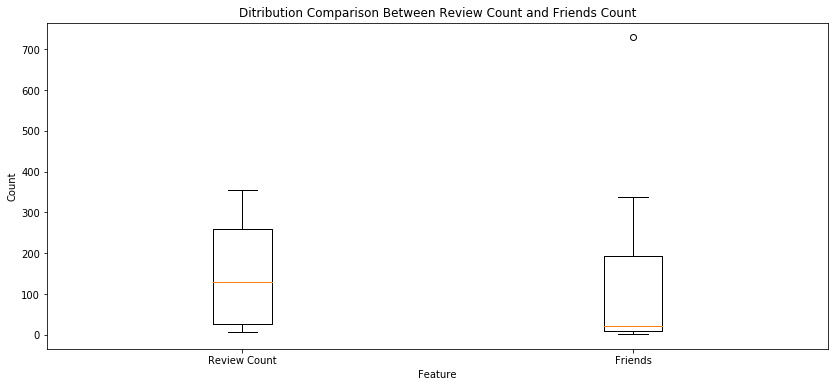

In [43]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, friends_counts])
plt.title('Ditribution Comparison Between Review Count and Friends Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Friends'])
plt.show()

Similar to Review Count, Friends also has positively skewed data distribution because of its longer top tail and median value being at bottom and both have almost same data dispersion. But, both features are in disagreement because Review Count has median value higher than Friends. Finally, one outlier found in Friends which is not good for data mining algorithms and it should be handled by outliers handling methods as outliers show errors in dataset.

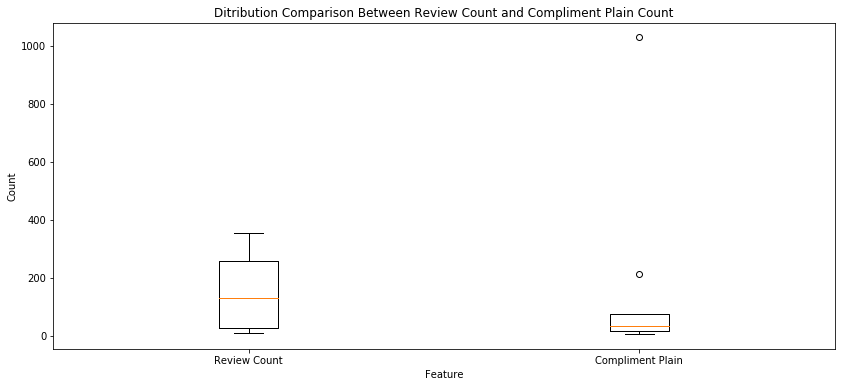

In [44]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_counts, comp_plain_counts])
plt.title('Ditribution Comparison Between Review Count and Compliment Plain Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Count', 'Compliment Plain'])
plt.show()

Similar to Review Count, Compliment Plain has positively skewed data distribution because of its median value being at bottom side of box which makes upper part of box bigger. But, data is very less dispersed in compared to Review Count. And, both features are in disagreement because Review Count has median value higher than Compliment Plain. Finally, two outliers found in Compliment Plain which should be handled with methods like outliers deletion or replacement etc. 

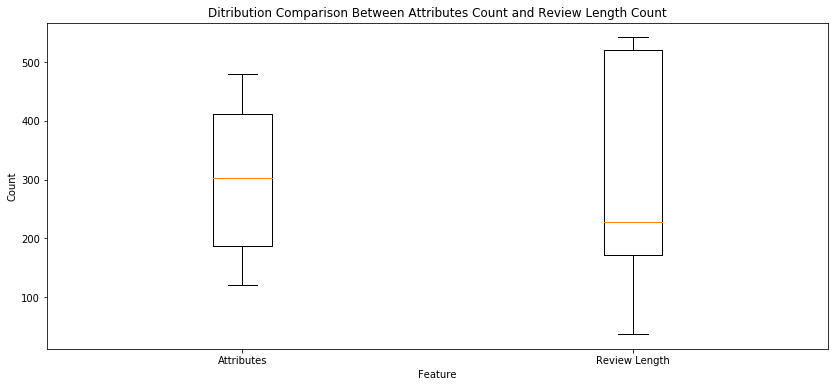

In [45]:
plt.figure(figsize=(14, 6))
plt.boxplot([attributes_counts, review_length_counts])
plt.title('Ditribution Comparison Between Attributes Count and Review Length Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Attributes', 'Review Length'])
plt.show()

Attributes is showing normal distribution of dataset compared to Review Length which has negatively skewed distribution because of its bottom tail being longer. Though, first quartile, second quartile, and third quartie of Review Length, all are different and higher than Attributes which suggests complete disgreement between both features, surely because of data being highly dispersed in Review Length compared to Attributes. Finally, no outliers found in both features count.

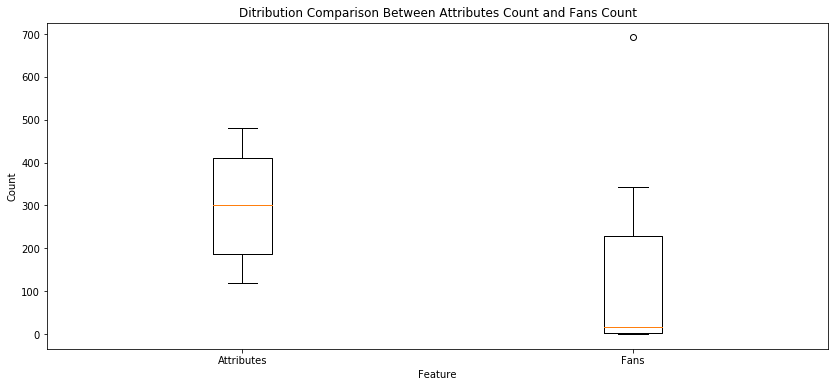

In [46]:
plt.figure(figsize=(14, 6))
plt.boxplot([attributes_counts, fans_counts])
plt.title('Ditribution Comparison Between Attributes Count and Fans Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Attributes', 'Fans'])
plt.show()

Compared to Attributes which has normal distribution, Fans has positively skewed (a.k.a skew-right) data distribution but has lower median value than Attributes which suggests disagreement between both features. Finally, one outlier found in Fans which should be handled properly in order to get reliable and accurate results from data mining algorithms.

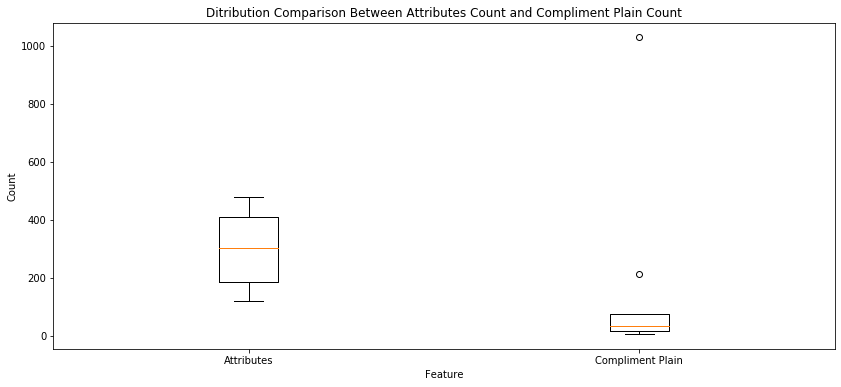

In [47]:
plt.figure(figsize=(14, 6))
plt.boxplot([attributes_counts, comp_plain_counts])
plt.title('Ditribution Comparison Between Attributes Count and Compliment Plain Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Attributes', 'Compliment Plain'])
plt.show()

Compared to Attributes which has normal distribution, Compliment Plain has positively skewed (a.k.a skew-right) data distribution but has lower median value than Attributes which suggests disagreement between both features. Finally, two outliers found in Fans which should be handled properly because of reasons mentioned above.

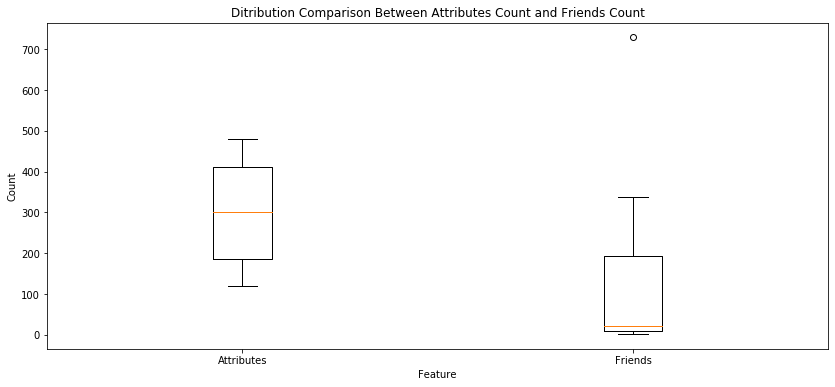

In [48]:
plt.figure(figsize=(14, 6))
plt.boxplot([attributes_counts, friends_counts])
plt.title('Ditribution Comparison Between Attributes Count and Friends Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Attributes', 'Friends'])
plt.show()

Compared to Attributes which has normal distribution, Friends has positively skewed (a.k.a skew-right) data distribution but has lower median value than Attributes which suggests disagreement between both features. Finally, one outlier found in Fans.

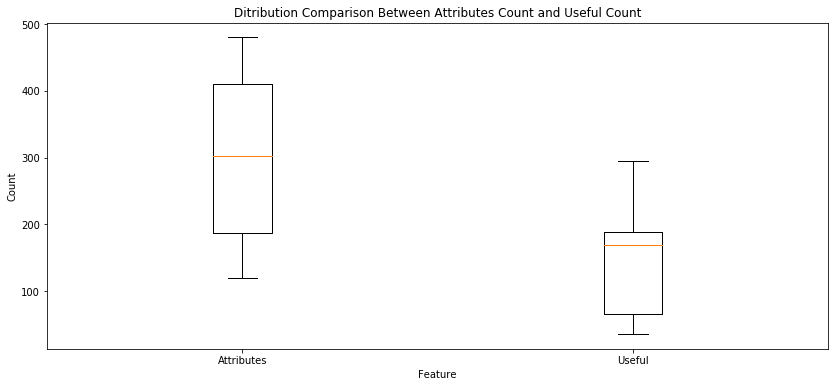

In [49]:
plt.figure(figsize=(14, 6))
plt.boxplot([attributes_counts, useful_counts])
plt.title('Ditribution Comparison Between Attributes Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Attributes', 'Useful'])
plt.show()

Compared to Attributes which has normal distribution, Useful has positively skewed (a.k.a skewed-right) data distribution and also has lower median value than Attributes which suggests disagreement between both features. Finally, no outliers found in both features.

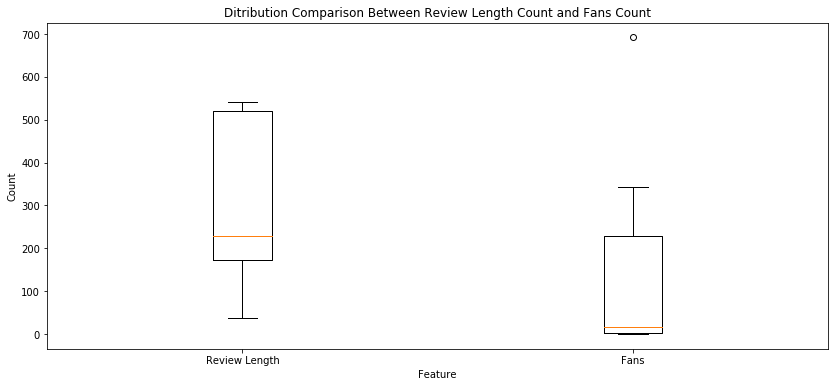

In [50]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_length_counts, fans_counts])
plt.title('Ditribution Comparison Between Review Length Count and Fans Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Length', 'Fans'])
plt.show()

Review Length is showing negatively skewed (a.k.a skew-left) data distribution because of its bottom tail being longer compared to Fans which has positively skewed (a.k.a skewed-right) data distribution as it has longer top tail and also lower median value compared to Review Length which suggests disagreement between both features. Finally, single outlier found in Fans.

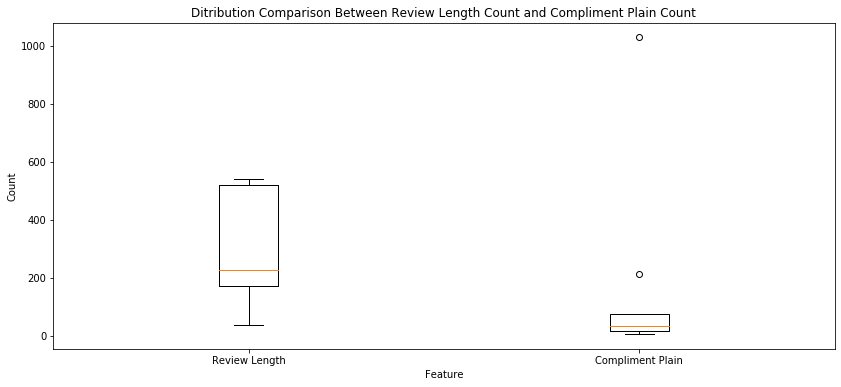

In [51]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_length_counts, comp_plain_counts])
plt.title('Ditribution Comparison Between Review Length Count and Compliment Plain Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Length', 'Compliment Plain'])
plt.show()

Compared to Review Length which has negatively skewed data distribution, Compliment Plain has positively skewed data distribution because of its median value being closer to bottom of box and data is also less dispersed in Compliment Plain with median value being lower compared to Review Length, which ultimately suggests disagreement between both features. Finally, two outliers found in Compliment Plain count.

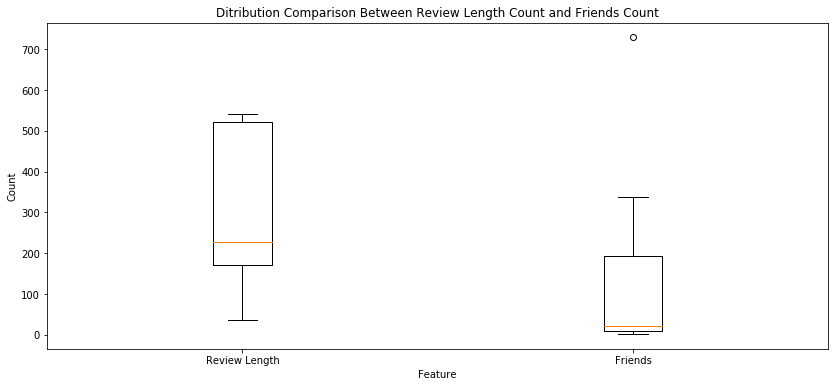

In [52]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_length_counts, friends_counts])
plt.title('Ditribution Comparison Between Review Length Count and Friends Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Length', 'Friends'])
plt.show()

Compared to Review Length which has negatively skewed data distribution, Friends has positively skewed data distribution because of its median value being closer to bottom of box and top longer tail and data is also less dispersed in Friends with median value being lower compared to Review Length, which shows disagreement between both features. Finally, one outlier found in Friends count.

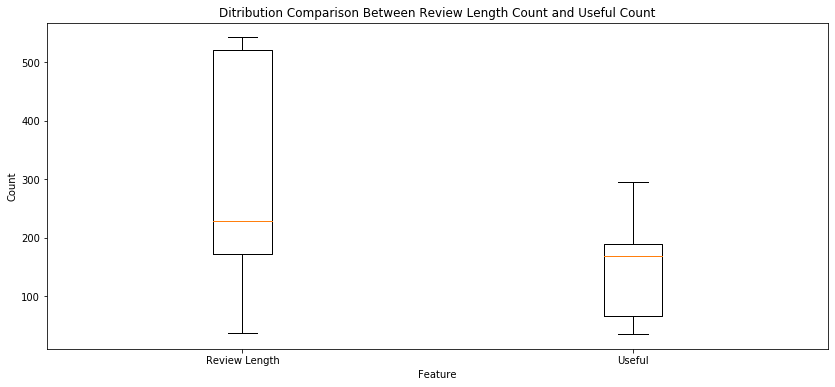

In [53]:
plt.figure(figsize=(14, 6))
plt.boxplot([review_length_counts, useful_counts])
plt.title('Ditribution Comparison Between Review Length Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Review Length', 'Useful'])
plt.show()

Compared to Review Length which has negatively skewed data distribution, Useful has positively skewed data distribution because of its top longer tail but data is less dispersed compared to Review Length, also median value of Useful is lower which shows disagreement between both features. Finally, no outliers found in both features count.

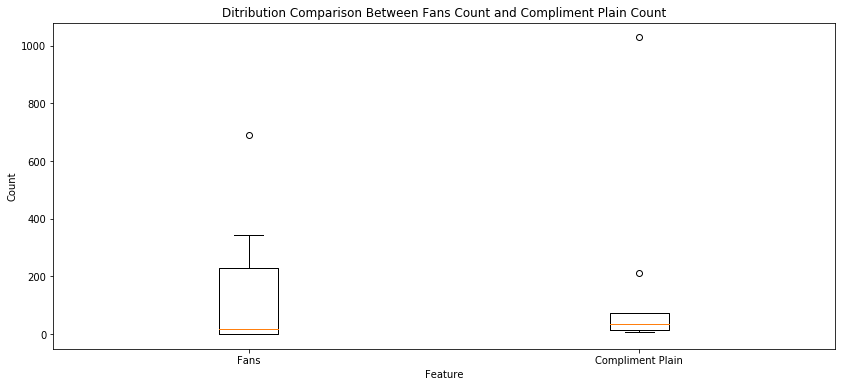

In [54]:
plt.figure(figsize=(14, 6))
plt.boxplot([fans_counts, comp_plain_counts])
plt.title('Ditribution Comparison Between Fans Count and Compliment Plain Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Fans', 'Compliment Plain'])
plt.show()

Fans and Compliment Plain both have postively skewed data distribution because of longer top tail in Fans and median value at bottom of box in Compliment Plain (two reasons which make data positively skewed but Fans has more dispersed distribution compared to Compliment Plain though median values of both are almost similar. We can deduce that both features have some similarities at initial part (e.g. First Quartile and Median) but disagreement in rest. Finally, outliers were found in both features.

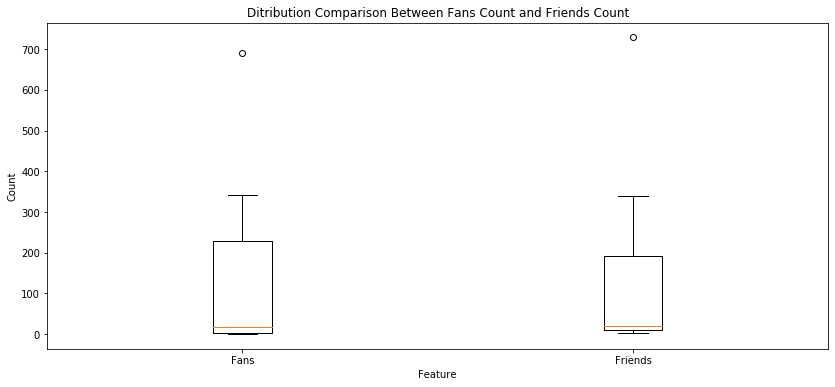

In [55]:
plt.figure(figsize=(14, 6))
plt.boxplot([fans_counts, friends_counts])
plt.title('Ditribution Comparison Between Fans Count and Friends Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Fans', 'Friends'])
plt.show()

Both Fans and Friends have positively skewed data distribution but Fans has slightly more dispersed data. Both features seems to have similar views in first quartile and median but disagree in top part of box because of different third and fourth quartiles including whiskers. Again, outliers found in both features.

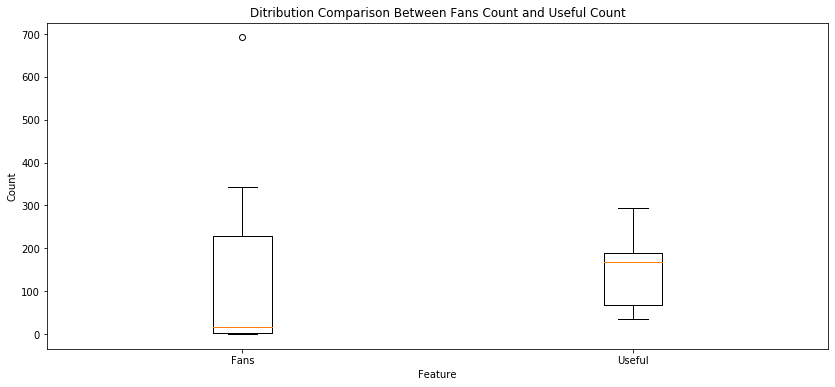

In [56]:
plt.figure(figsize=(14, 6))
plt.boxplot([fans_counts, useful_counts])
plt.title('Ditribution Comparison Between Fans Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Fans', 'Useful'])
plt.show()

Again, both features have positively skewed data distribution but differ in all quartiles including median value and whiskers so they're in disagreement. Although, Fans is slightly more dispersed than Useful. Finally, one outlier was found in Fans count.

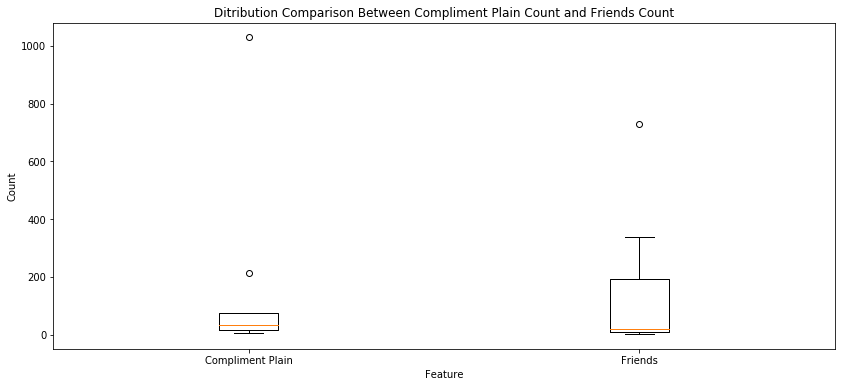

In [57]:
plt.figure(figsize=(14, 6))
plt.boxplot([comp_plain_counts, friends_counts])
plt.title('Ditribution Comparison Between Compliment Plain Count and Friends Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Compliment Plain', 'Friends'])
plt.show()

Both features have data distribution of skew-right but differ in all quartiles and whiskers. Also, Compliment Plain is way less dispersed in terms of distribution than Friends. Finally, outliers were found in both features counts.

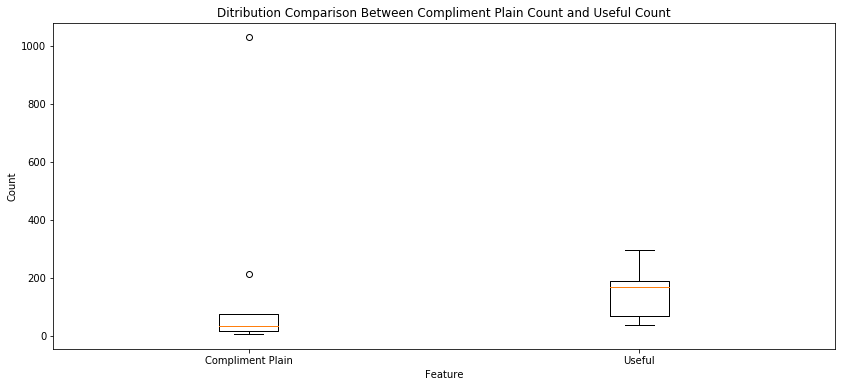

In [58]:
plt.figure(figsize=(14, 6))
plt.boxplot([comp_plain_counts, useful_counts])
plt.title('Ditribution Comparison Between Compliment Plain Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Compliment Plain', 'Useful'])
plt.show()

Again, both features are showing data distribution of skew-right because of median value being closest to bottom part of box in Compliment Plain (which makes upper part bigger) and longer top tail in Useful. And, they differ in all quartiles so they're in complete disagreement. Finally, outliers were found in Compliment Plain.

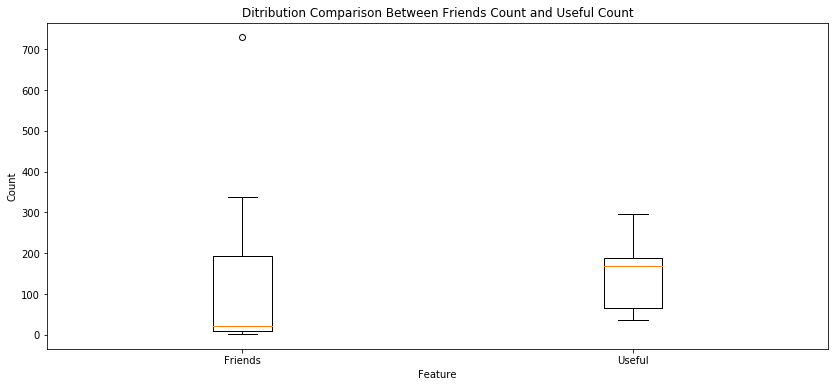

In [59]:
plt.figure(figsize=(14, 6))
plt.boxplot([friends_counts, useful_counts])
plt.title('Ditribution Comparison Between Friends Count and Useful Count')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks([1, 2], ['Friends', 'Useful'])
plt.show()

Friends and Useful both have skew-right data distribution, whereas Friends is slightly more dispersed than Useful and have different quartile ranges than Useful which suggest disagreement with Useful. Finally, one outlier was found in Friends.

### Histograms

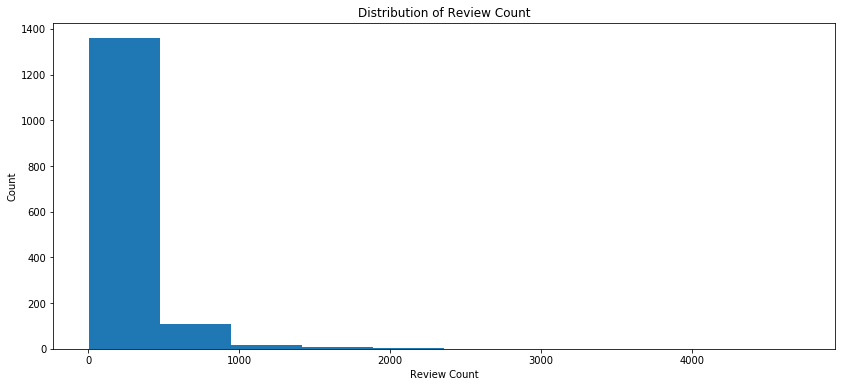

In [60]:
review_count = final_dataset.get_column('Review Count')
plot_utils.histogram(review_count, 10, 'Distribution of Review Count', 'Review Count', 'Count')

Skew-Right

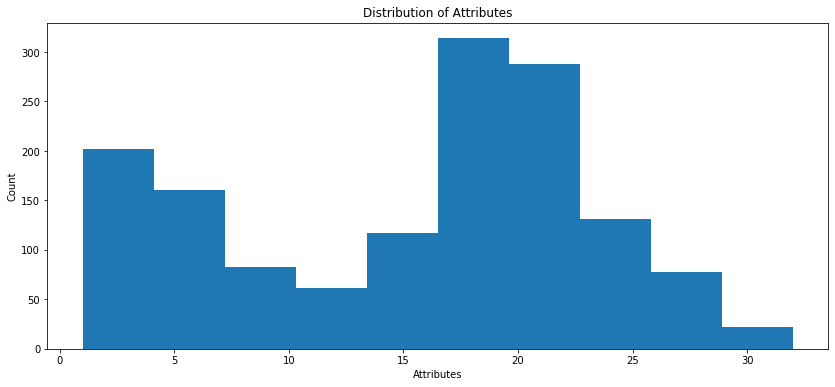

In [61]:
attributes = final_dataset.get_column('Attributes')
attributes = [len(k.keys()) for k in attributes if k]
plot_utils.histogram(attributes, 10, 'Distribution of Attributes', 'Attributes', 'Count')

Bidomal

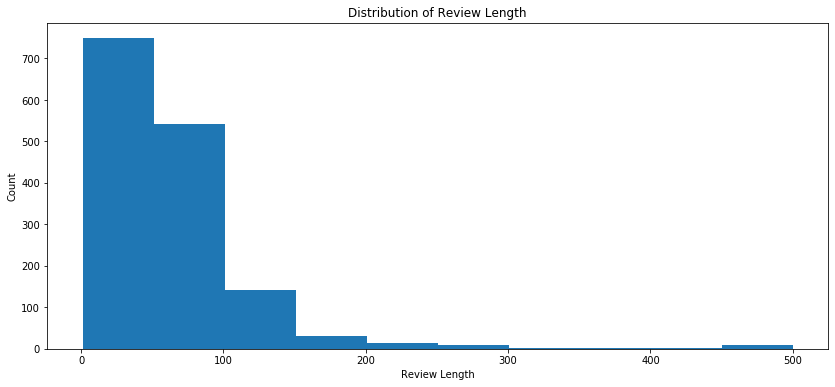

In [62]:
text = final_dataset.get_column('Review Length')
text_length = [len(str(t)) for t in text]
plot_utils.histogram(text_length, 10, 'Distribution of Review Length', 'Review Length', 'Count')

Skew-Right

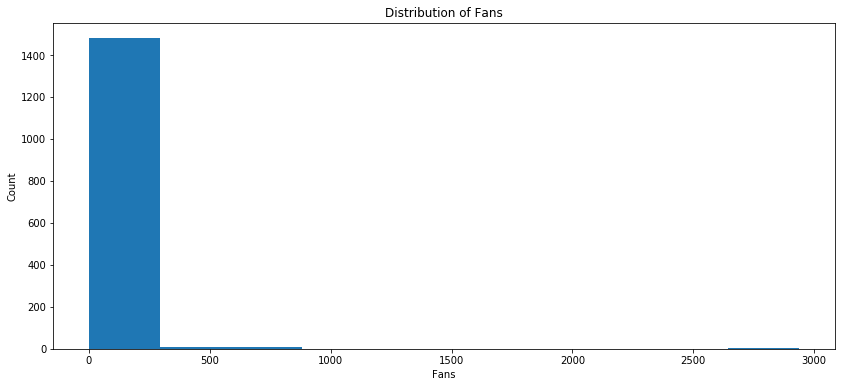

In [63]:
compliment_count = final_dataset.get_column('Fans')
plot_utils.histogram(compliment_count, 10, 'Distribution of Fans', 'Fans', 'Count')

Skew-Right

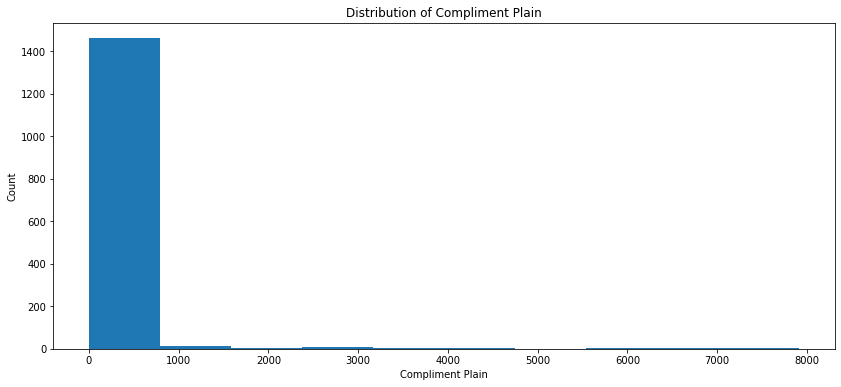

In [64]:
compliment_count = final_dataset.get_column('Compliment Plain')
plot_utils.histogram(compliment_count, 10, 'Distribution of Compliment Plain', 'Compliment Plain', 'Count')

Skew-Right

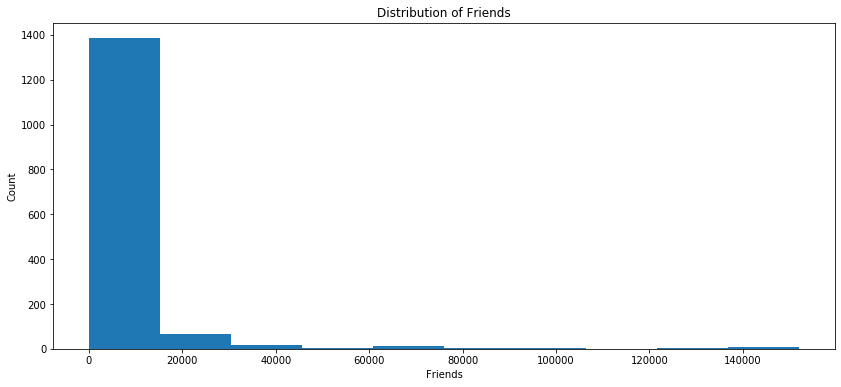

In [65]:
friends = final_dataset.get_column('Friends')
friends = [len(f) for f in friends]
plot_utils.histogram(friends, 10, 'Distribution of Friends', 'Friends', 'Count')

Skew-Right

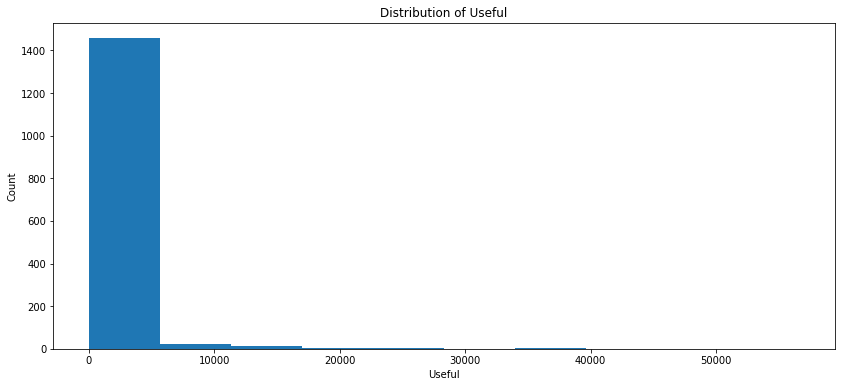

In [66]:
useful = final_dataset.get_column('Useful')
plot_utils.histogram(useful, 10, 'Distribution of Useful', 'Useful', 'Count')

Skew-Right

## Simple Linear Regression

Formula for regression line that best fits dataset: 
$$y = mx + b$$

Slope $m$:
$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

Intercept $b$:
$$b = $\bar{y} - m\bar{x}$$

Correlation Coefficient $r$:
$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Covariance $cov$:
$$cov = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n}$$

Standard Error Formula:
$$stderr = \sqrt{\frac{\sum_{i=1}^{n}(y_i - y^\prime)^2}{n}}$$

### Finding Correlation Between Useful and Fans

In [67]:
X = final_dataset.get_column('Useful')
X = [[x] for x in X]
y = final_dataset.get_column('Fans')

In [68]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

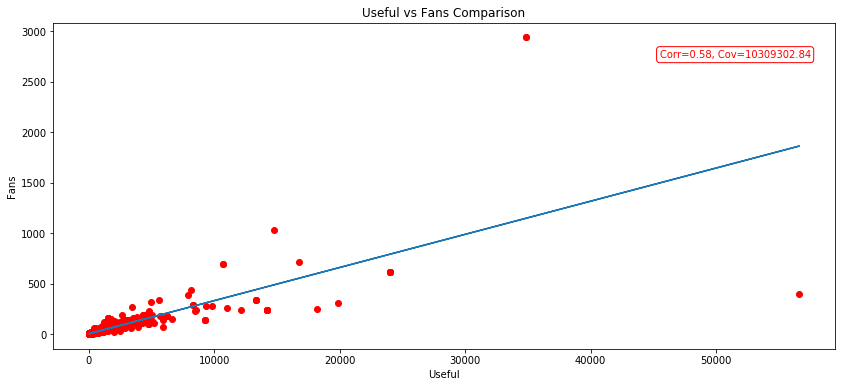

In [69]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Useful vs Fans Comparison', 'Useful', 'Fans', regression_line, corr, cov, 45500, max(y) - 200)

Moderate Relationship

### Finding Correlation Between Useful and Friends

In [70]:
X = final_dataset.get_column('Useful')
X = [[x] for x in X]
y = final_dataset.get_column('Friends')
y = [len(f) for f in y]

In [71]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

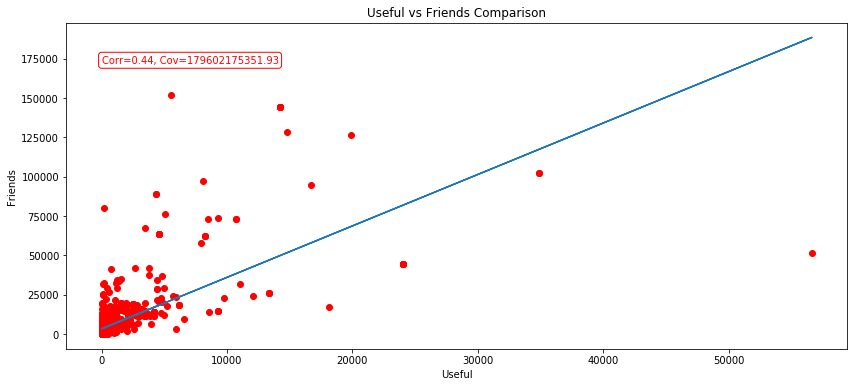

In [72]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Useful vs Friends Comparison', 'Useful', 'Friends', regression_line, corr, cov, 0, max(y) + 20000)

Moderate Relationship

### Finding Correlation Between Useful and Review Length

In [73]:
X = final_dataset.get_column('Useful')
X = [[x] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [74]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

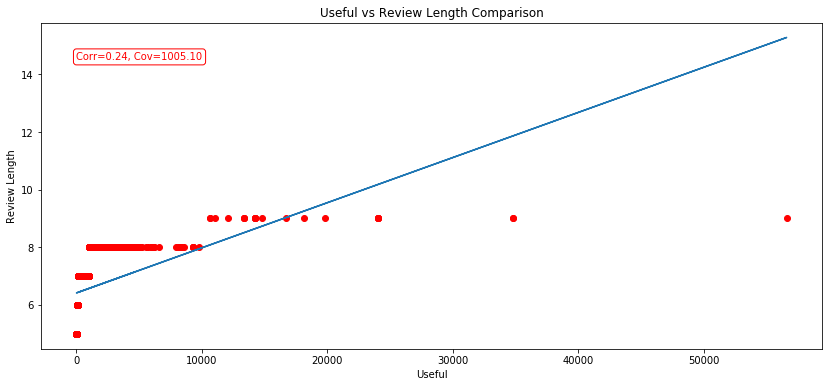

In [75]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Useful vs Review Length Comparison', 'Useful', 'Review Length', regression_line, corr, cov, 0, max(y) + 5.5)

Weak Relationship

### Finding Correlatin Between Useful and Compliment Plain

In [76]:
X = final_dataset.get_column('Useful')
X = [[x] for x in X]
y = final_dataset.get_column('Compliment Plain')

In [77]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

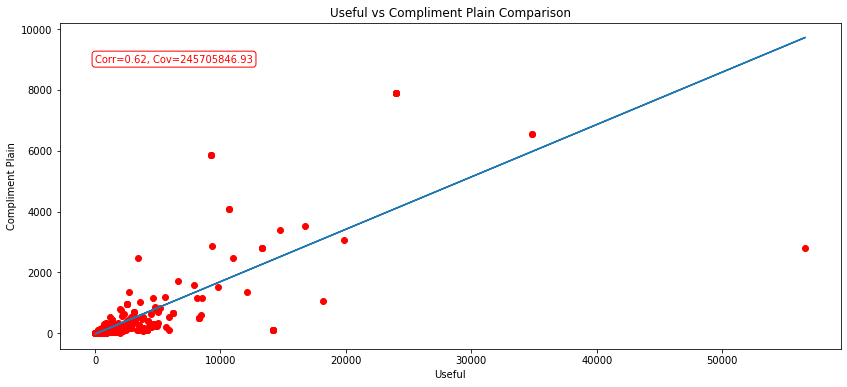

In [78]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Useful vs Compliment Plain Comparison', 'Useful', 'Compliment Plain', regression_line, corr, cov, 0, max(y) + 1000)

Strong Relationship

### Finding Correlation Between Attributes Count and Review Length

In [79]:
X = final_dataset.get_column('Attributes')
X = [[len(x.keys()) if x else 0] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [80]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

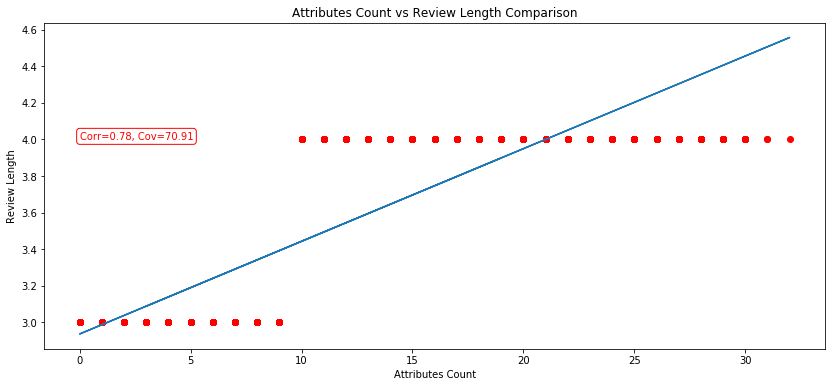

In [81]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Attributes Count vs Review Length Comparison', 'Attributes Count', 'Review Length', regression_line, corr, cov, 0, max(y) + 0.)

Strong Relationship

### Finding Correlation Between Review Count and Review Length

In [82]:
X = final_dataset.get_column('Review Count')
X = [[x] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [83]:
len(X), len(y)

(1500, 1500)

In [84]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

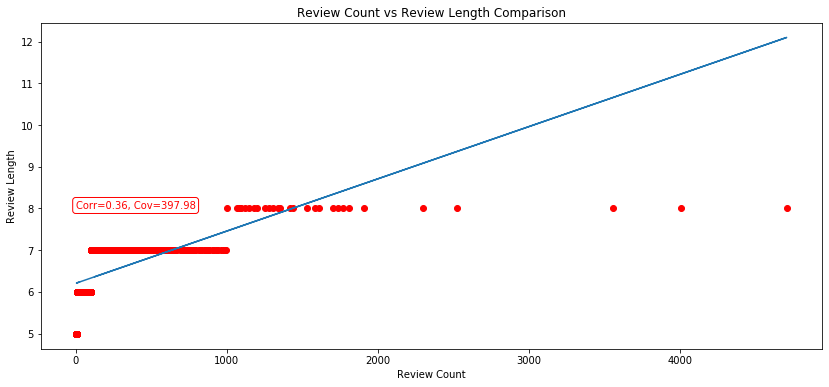

In [85]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Review Count vs Review Length Comparison', 'Review Count', 'Review Length', regression_line, corr, cov, 0, max(y))

Weak Relationship

 ### Finding Correlation Between Compliment Plain and Review Length

In [86]:
X = final_dataset.get_column('Compliment Plain')
X = [[x] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [87]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

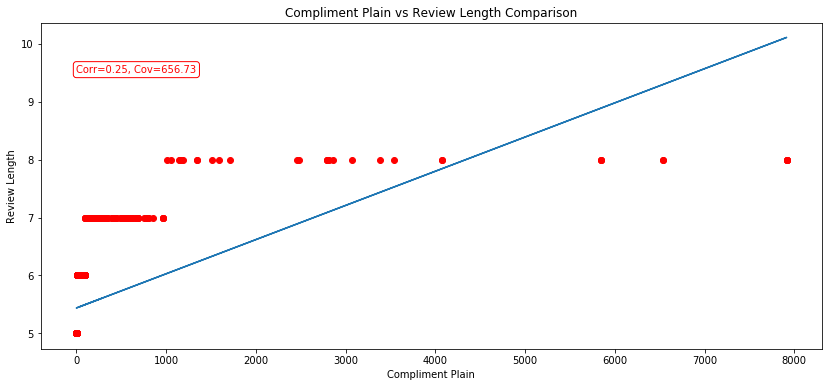

In [88]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Compliment Plain vs Review Length Comparison', 'Compliment Plain', 'Review Length', regression_line, corr, cov, 0, max(y) + 1.5)

Weak Relationship

### Finding Correlation Between Fans and Review Length

In [89]:
X = final_dataset.get_column('Fans')
X = [[x] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [90]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

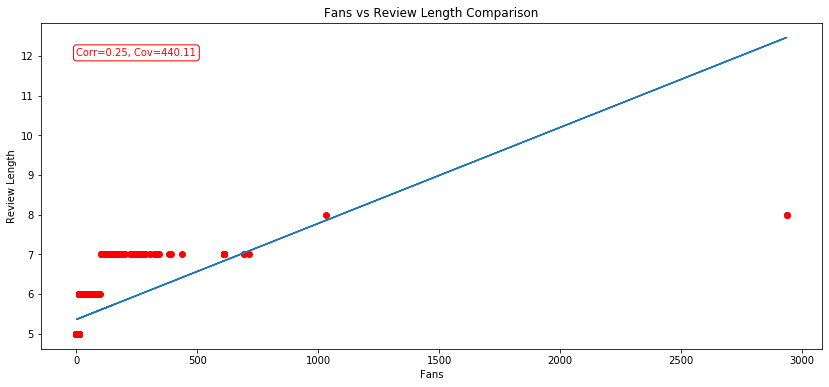

In [91]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Fans vs Review Length Comparison', 'Fans', 'Review Length', regression_line, corr, cov, 0, max(y) + 4)

Weak Relationship

### Finding Correlation Between Friends and Review Length

In [92]:
X = final_dataset.get_column('Friends')
X = [[len(str(x))] for x in X]
y = final_dataset.get_column('Review Length')
y = [len(str(x)) for x in X]

In [93]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

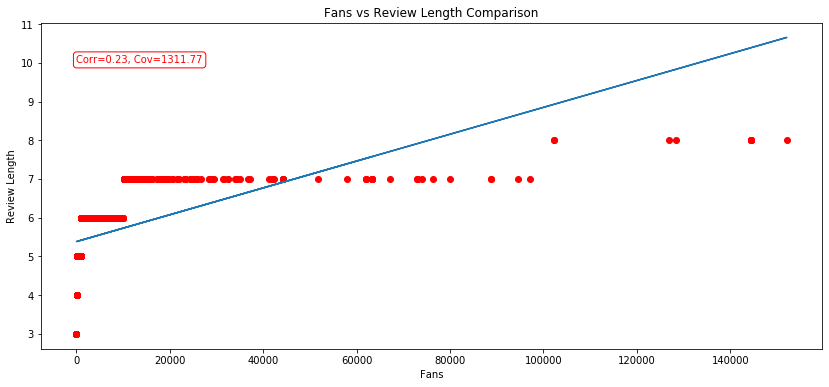

In [94]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Fans vs Review Length Comparison', 'Fans', 'Review Length', regression_line, corr, cov, 0, max(y) + 2)

Weak Relationship

### Finding Correlation Between Fans and Compliment Plain

In [95]:
X = final_dataset.get_column('Fans')
X = [[x] for x in X]
y = final_dataset.get_column('Compliment Plain')

In [96]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

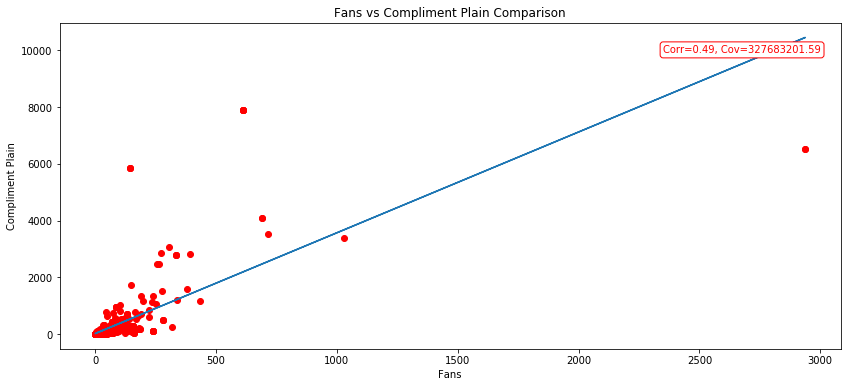

In [97]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Fans vs Compliment Plain Comparison', 'Fans', 'Compliment Plain', regression_line, corr, cov, 2350, max(y) + 2000)

Moderate Relationship

### Finding Correlation Between Fans and Friends

In [98]:
X = final_dataset.get_column('Fans')
X = [[x] for x in X]
y = final_dataset.get_column('Friends')
y = [len(f) for f in y]

In [99]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

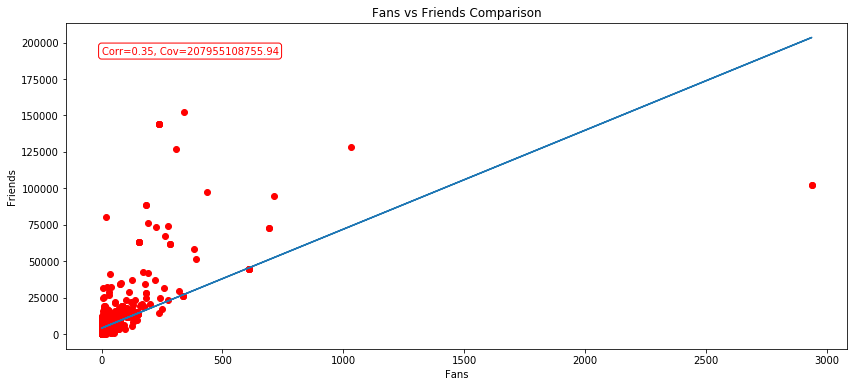

In [100]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Fans vs Friends Comparison', 'Fans', 'Friends', regression_line, corr, cov, 0, max(y) + 40000)

Weak Relationship

### Finding Correlation Between Friends and Compliment Plain

In [101]:
X = final_dataset.get_column('Friends')
X = [[len(x)] for x in X]
y = final_dataset.get_column('Compliment Plain')

In [102]:
regressor = MySimpleLinearRegressor()
regressor.fit(X, y)

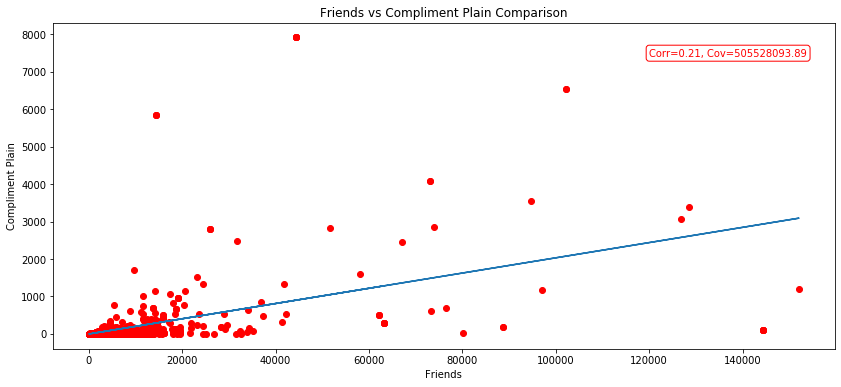

In [103]:
m, b = regressor.slope, regressor.intercept
x = [x[0] for x in X]
regression_line = [(m*i)+b for i in x]
corr = myutils.coefficient_correlation(y, regression_line)
cov = myutils.squared_error(y, regression_line)
plot_utils.scatter_plot(x, y, 'Friends vs Compliment Plain Comparison', 'Friends', 'Compliment Plain', regression_line, corr, cov, 120000, max(y) - 500)

Weak Relationship